<h1 style="text-align: center;">🔤 Classification Notebook 🔤</h1>

## Project Overview  
This project aims to build a machine learning model capable of classifying news articles into five categories: Business, Technology, Sports, Education, and Entertainment. The dataset consists of text features such as headlines, description, and content, with corresponding category labels. Both a training and testing set are used for model evaluation.

### Imports
Import necessary libraries and packages required for data analysis and visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_moons, make_circles, make_classification

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

### Data Pre-Processing

The datasets (train.csv and test.csv) are loaded then data cleaned and processed into readable format for classification.

In [2]:

# Load the datasets
print('Loading datasets...')
train_articles = pd.read_csv('https://raw.githubusercontent.com/Jana-Liebenberg/2401PTDS_Classification_Project/refs/heads/main/Data/processed/train.csv')  
test_articles = pd.read_csv('https://raw.githubusercontent.com/Jana-Liebenberg/2401PTDS_Classification_Project/refs/heads/main/Data/processed/test.csv')    

# Drop the 'url' column
print('Dropping URL column...')
train_articles.drop(columns=['url'], inplace=True, errors='ignore')
test_articles.drop(columns=['url'], inplace=True, errors='ignore')

# Display the first few rows to verify
print(train_articles.head())
print(test_articles.head())


Loading datasets...
Dropping URL column...
                                           headlines  \
0  RBI revises definition of politically-exposed ...   
1  NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...   
2  Akasa Air ‘well capitalised’, can grow much fa...   
3  India’s current account deficit declines sharp...   
4  States borrowing cost soars to 7.68%, highest ...   

                                         description  \
0  The central bank has also asked chairpersons a...   
1  NDTV's consolidated revenue from operations wa...   
2  The initial share sale will be open for public...   
3  The current account deficit (CAD) was 3.8 per ...   
4  The prices shot up reflecting the overall high...   

                                             content  category  
0  The Reserve Bank of India (RBI) has changed th...  business  
1  Broadcaster New Delhi Television Ltd on Monday...  business  
2  Homegrown server maker Netweb Technologies Ind...  business  
3  India’s current acco

In [3]:
# Combine text columns for training set
train_articles['combined_text'] = train_articles['headlines'] + ' ' + train_articles['description'] + ' ' + train_articles['content']

# Combine text columns for test set
test_articles['combined_text'] = test_articles['headlines'] + ' ' + test_articles['description'] + ' ' + test_articles['content']


In [4]:
# Convert all text in the 'combined_text' column to lowercase
print ('Lowering case...')
train_articles['combined_text'] = train_articles['combined_text'].str.lower()
test_articles['combined_text'] = test_articles['combined_text'].str.lower()

# Define a function to remove punctuation and numbers from the 'combined_text' column
import string
print ('Cleaning punctuation...')
def remove_punctuation_numbers(post):
    punc_numbers = string.punctuation + '0123456789'
    return ''.join([l for l in post if l not in punc_numbers])
    
# Apply the remove_punctuation_numbers function to the 'post' column
train_articles['combined_text'] = train_articles['combined_text'].apply(remove_punctuation_numbers)
test_articles['combined_text'] = test_articles['combined_text'].apply(remove_punctuation_numbers)

print(train_articles['combined_text'])
print(test_articles['combined_text'])


Lowering case...
Cleaning punctuation...
0       rbi revises definition of politicallyexposed p...
1       ndtv q net profit falls  to rs  crore impacted...
2       akasa air ‘well capitalised’ can grow much fas...
3       india’s current account deficit declines sharp...
4       states borrowing cost soars to  highest so far...
                              ...                        
5515    samsung sends out invites for ‘unpacked ’ new ...
5516    google pixel  pro accidentally appears on offi...
5517    amazon ad on google search redirects users to ...
5518    elon musk’s x previously twitter now worth les...
5519    apple’s ios  update released and here’s how it...
Name: combined_text, Length: 5520, dtype: object
0       nlc india wins contract for power supply to ra...
1       sbi clerk prelims exams dates announced admit ...
2       golden globes michelle yeoh will ferrell angel...
3       oneplus nord  at rs  as part of new price cut ...
4       adani family’s partners used ‘op

In [5]:
#This code uses `CountVectorizer` to convert the text data from the training and test sets into a matrix of token counts, while removing English stop words.

# Initialize CountVectorizer
vect = CountVectorizer(stop_words='english')

# training set
X_train = vect.fit_transform(train_articles['combined_text'])

# only transform the test set
X_test = vect.transform(test_articles['combined_text'])


In [6]:
#categorise y 

# Initialize LabelEncoder
le = LabelEncoder()

# training 
y_train = le.fit_transform(train_articles['category'])

# only transform the test set
y_test = le.transform(test_articles['category'])



### Testing Classification Models

Multiple classifiers were evaluated on a dataset, focusing on metrics such as Accuracy, Precision, Recall, F1-scores, and Training Time.

In [7]:
# Define the names of the classifiers
names = ['Logistic Regression', 'Nearest Neighbors', 
         'Linear SVM', 'RBF SVM']

In [8]:
# Define the classifiers with their respective hyperparameters
classifiers = [
    LogisticRegression(), 
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025)
]

In [9]:
import pandas as pd
from sklearn import metrics
import time

# Empty lists to store results
results = []  # Store evaluation metrics for each classifier
models = {}  # Store trained models
confusion = {}  # Store confusion matrices for each classifier
class_report = {}  # Store classification reports for each classifier

# Names of the classifiers (ensure this list matches the classifiers list)
names = ['Logistic Regression', 'KNN', 'SVC Linear']

# Iterate over each classifier
for name, clf in zip(names, classifiers):
    print('Fitting {:s} model...'.format(name))
    
    # Measure the time taken to fit the model
    start_time = time.time()
    clf.fit(X_train, y_train)
    run_time = time.time() - start_time
    
    print('... predicting')
    # Predict on the training data
    y_pred_train = clf.predict(X_train)   
    y_pred_test = clf.predict(X_test)
    
    print('... scoring')
    # Calculate evaluation metrics for training data
    accuracy = metrics.accuracy_score(y_train, y_pred_train)
    precision = metrics.precision_score(y_train, y_pred_train, average='weighted')
    recall = metrics.recall_score(y_train, y_pred_train, average='weighted')
    f1 = metrics.f1_score(y_train, y_pred_train, average='weighted')    
    
    # Calculate evaluation metrics for test data
    f1_test = metrics.f1_score(y_test, y_pred_test, average='weighted')    
    
    # Save the results to dictionaries
    models[name] = clf    
    confusion[name] = metrics.confusion_matrix(y_train, y_pred_train)
    class_report[name] = metrics.classification_report(y_train, y_pred_train)
    
    # Append results to the list
    results.append([name, accuracy, precision, recall, f1, f1_test, run_time])

# Convert results to DataFrame for easy visualization
results_df = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test', 'Train Time'])
results_df.set_index('Classifier', inplace=True)

print('... All done!')
print(results_df)


Fitting Logistic Regression model...
... predicting
... scoring
Fitting KNN model...
... predicting
... scoring
Fitting SVC Linear model...
... predicting
... scoring
... All done!
                     Accuracy  Precision    Recall  F1 Train   F1 Test  \
Classifier                                                               
Logistic Regression  1.000000   1.000000  1.000000  1.000000  0.977574   
KNN                  0.906522   0.917236  0.906522  0.905539  0.804954   
SVC Linear           1.000000   1.000000  1.000000  1.000000  0.976583   

                     Train Time  
Classifier                       
Logistic Regression    2.379979  
KNN                    0.002074  
SVC Linear             4.882543  


In [10]:
results_df.sort_values('F1 Train', ascending=False)

,Accuracy,Precision,Recall,F1 Train,F1 Test,Train Time
Classifier,,,,,,
Logistic Regression,1.000000,1.000000,1.000000,1.000000,0.977574,2.379979
SVC Linear,1.000000,1.000000,1.000000,1.000000,0.976583,4.882543
KNN,0.906522,0.917236,0.906522,0.905539,0.804954,0.002074


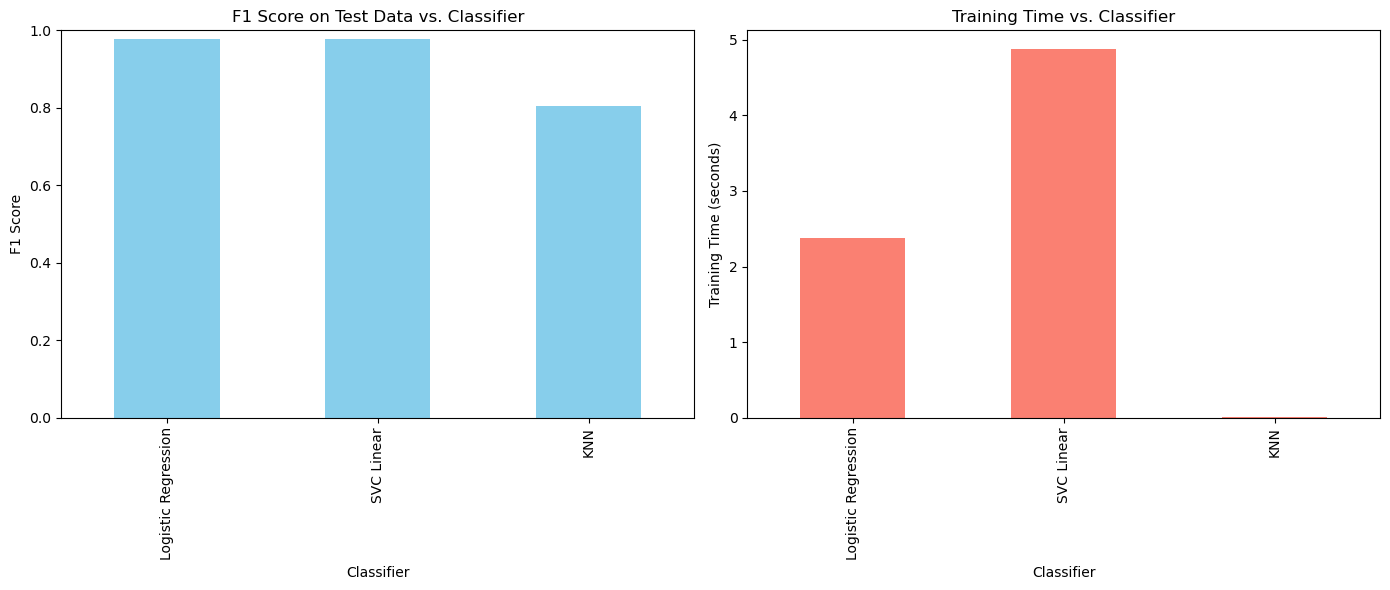

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# F1 Test Score Plot
results_df.sort_values('F1 Train', ascending=False, inplace=True)
results_df['F1 Test'].plot(kind='bar', ax=ax[0], color='skyblue', ylim=[0, 1])
ax[0].set_title('F1 Score on Test Data vs. Classifier')
ax[0].set_ylabel('F1 Score')
ax[0].set_xlabel('Classifier')

# Training Time Plot
results_df['Train Time'].plot(kind='bar', ax=ax[1], color='salmon')
ax[1].set_title('Training Time vs. Classifier')
ax[1].set_ylabel('Training Time (seconds)')
ax[1].set_xlabel('Classifier')

plt.tight_layout()
plt.show()

A confusion matrix was also used as a performance measurement tool for each model. 

In [12]:
# Display confusion matrices and classification reports
for name, matrix in confusion.items():
    print(f"Confusion Matrix for {name}:")
    print(matrix)
    print()
    
for name, report in class_report.items():
    print(f"Classification Report for {name}:")
    print(report)
    print()

Confusion Matrix for Logistic Regression:
[[1120    0    0    0    0]
 [   0 1520    0    0    0]
 [   0    0  960    0    0]
 [   0    0    0  640    0]
 [   0    0    0    0 1280]]

Confusion Matrix for KNN:
[[1031    4    0    5   80]
 [   5 1484    1    1   29]
 [   3   84  711   13  149]
 [   4   74    0  531   31]
 [  13   20    0    0 1247]]

Confusion Matrix for SVC Linear:
[[1120    0    0    0    0]
 [   0 1520    0    0    0]
 [   0    0  960    0    0]
 [   0    0    0  640    0]
 [   0    0    0    0 1280]]

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1120
           1       1.00      1.00      1.00      1520
           2       1.00      1.00      1.00       960
           3       1.00      1.00      1.00       640
           4       1.00      1.00      1.00      1280

    accuracy                           1.00      5520
   macro avg       1.00      1.00      1.00   

### Model Validation

In [15]:
# Initialize an empty list to store cross-validation results
cv = []

# Iterate over each model in the 'models' dictionary
for name, model in models.items():
    print()  # Print an empty line for better readability
    print(name)  # Print the name of the current model
    # Perform k-fold cross-validation (with k=5) on the current model
    scores = cross_val_score(model, X_train.toarray(), y_train, cv=3)
    # Calculate the mean and standard deviation of the cross-validation scores
    print("Accuracy: {:0.2f} (+/- {:0.4f})".format(scores.mean(), scores.std()))
    # Append the model name, mean cross-validation score, and standard deviation to the 'cv' list
    cv.append([name, scores.mean(), scores.std()])

# Convert the list of cross-validation results to a DataFrame
cv = pd.DataFrame(cv, columns=['Model', 'CV_Mean', 'CV_Std_Dev'])

# Set the index of the DataFrame to the model names
cv.set_index('Model', inplace=True)


Logistic Regression
Accuracy: 0.98 (+/- 0.0041)

KNN
Accuracy: 0.80 (+/- 0.0107)

SVC Linear
Accuracy: 0.98 (+/- 0.0048)


<Axes: xlabel='Model'>

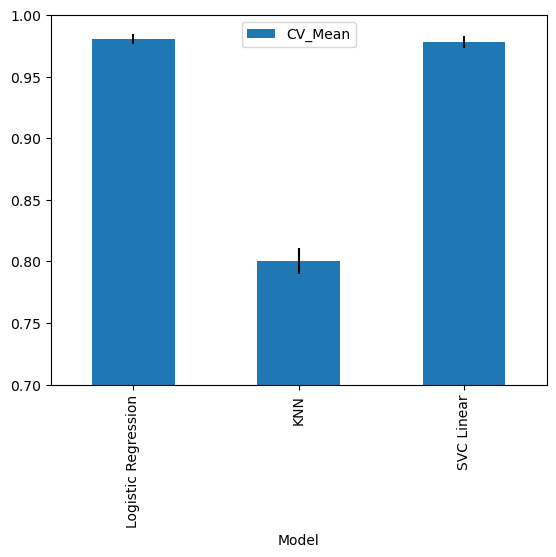

In [16]:
# Plot the mean cross-validation scores with error bars representing the standard deviation
# Set the y-axis to represent the mean cross-validation scores
# Set the error bars to represent the standard deviation of the cross-validation scores
# Limit the y-axis to the range [0.65, 0.85] for better visualization
cv.plot(y='CV_Mean', yerr='CV_Std_Dev', kind='bar', ylim=[0.7, 1])


### Insights 
We summarize findings from the analysis and discuss any conclusions drawn and insights gained from the data.

This table provides a comparison of three classifiers—Logistic Regression, SVC Linear, and KNN—based on key performance metrics such as accuracy, precision, recall, F1 scores (for both training and testing), and training time:

| Classifier            | Accuracy  | Precision | Recall    | F1 Train  | F1 Test  | Train Time |
|-----------------------|-----------|-----------|-----------|-----------|----------|------------|
| Logistic Regression    | 1.000000  | 1.000000  | 1.000000  | 1.000000  | 0.977574 | 2.382059   |
| SVC Linear             | 1.000000  | 1.000000  | 1.000000  | 1.000000  | 0.976583 | 4.989158   |
| KNN                    | 0.906522  | 0.917236  | 0.906522  | 0.905539  | 0.804954 | 0.002600   |


Logistic Regression and SVC Linear both achieved perfect performance across all metrics during training, with accuracy, precision, recall, and F1 scores of 1.000. However, the F1 score on the test set for both models slightly dropped, with Logistic Regression scoring 0.978 and SVC Linear scoring 0.977. Logistic Regression also trained faster than SVC Linear, taking 2.38 seconds compared to 4.99 seconds.

KNN performed worse than both Logistic Regression and SVC Linear. It had lower accuracy (0.907), precision (0.917), recall (0.907), and F1 scores, especially on the test set (0.805). However, KNN was significantly faster to train, taking only 0.0026 seconds.

With regards to the confusion matrix, both Logistic Regression and SVC Linear show perfect classification, making them the most accurate models for this dataset.
KNN, while not as perfect, shows reasonable performance, with some confusion between certain categories.

Further, Logistic Regression and SVC Linear are identical in performance, both achieving 100% accuracy and perfect scores across precision, recall, and F1. While KNN shows strong, but not perfect, performance with an accuracy of 91%. It struggles slightly with precision for Class 4 and recall for Class 2 but still delivers high F1-scores across most classes.

### Conclusion

In summary, while Logistic Regression and SVC Linear show very high and comparable performance, KNN underperforms but is the fastest in terms of training time.